In [50]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df_match = pd.read_csv('dataset.csv')
all_match_attributes=df_match.columns.values.tolist()
after_match_attributes =['home_team_goal', 'away_team_goal', 'possession_home', 'shoton_home', 'shoton_away', 
                      'shotoff_home', 'shotoff_away', 'corner_home', 'corner_away', 'cross_home', 'cross_away', 
                      'foulcommit_home', 'foulcommit_away', 'rcard_home', 'rcard_away', 'ycard_home', 'ycard_away', 
                      'throwin_home', 'throwin_away']
before_match_attributes = list(set(all_match_attributes) - set(after_match_attributes))
df_before_match = df_match[before_match_attributes]

In [39]:
holdout_per=0.2
df_before_match_out_test = df_before_match.sample(frac=holdout_per)
df_before_match_out_testtarget = df_match[df_match.index.isin(df_before_match_out_test.index.values.tolist())]['possession_home']

df_before_match_out_training = df_before_match.iloc[list(set(df_before_match.index.values.tolist())-set(df_before_match_out_test.index.values.tolist()))]
df_before_match_out_trainingtarget = df_match[df_match.index.isin(df_before_match_out_training.index.values.tolist())]['possession_home']

41

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-10-29 21:57:54] Features: 1/41 -- score: -56.6326179725[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished

[2017-10-29 21:57:55] Features: 2/41 -- score: -51.2254873963[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.6s finished

[2017-10-29 21:57:55] Features: 3/41 -- score: -50.0648477568[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.7s finished

[2017-10-29 21:57:56] Features: 4/41 -- score: -49.2565298051[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.6s finished

[

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2017-10-29 21:58:36] Features: 40/41 -- score: -50.2735280926[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2017-10-29 21:58:36] Features: 41/41 -- score: -50.7145155163

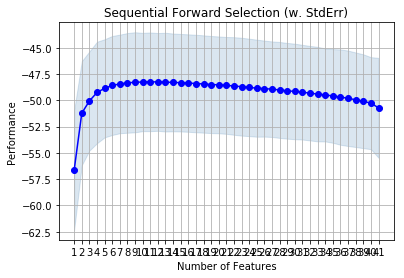

In [53]:
lr = linear_model.LinearRegression()
sfs = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs = sfs.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [61]:
df_features_forward = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df_features_forward

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-56.6326,12.6807,"[-41.0180775244, -38.2609392645, -40.646852775...","(12,)",17.0734,5.69114
2,-51.2255,11.0111,"[-36.4476873841, -34.1758388847, -39.492384872...","(12, 15)",14.8255,4.94185
3,-50.0648,10.4977,"[-40.116525236, -36.4149829964, -36.3880456697...","(12, 29, 15)",14.1342,4.71141
4,-49.2565,10.7467,"[-40.0965613731, -36.3807404499, -34.380141392...","(0, 12, 29, 15)",14.4696,4.82319
5,-48.8595,10.3952,"[-38.924815495, -35.9628340406, -34.7814038588...","(0, 12, 29, 30, 15)",13.9963,4.66543
6,-48.5893,10.4886,"[-37.6356472605, -35.1551283208, -35.165462568...","(0, 31, 12, 29, 30, 15)",14.1221,4.70736
7,-48.4439,10.442,"[-36.8597910491, -34.788996497, -35.3148781541...","(0, 33, 31, 12, 29, 30, 15)",14.0592,4.68641
8,-48.3444,10.5599,"[-36.1411471419, -34.6852900864, -35.804512640...","(0, 33, 11, 31, 12, 29, 30, 15)",14.2181,4.73936
9,-48.2868,10.6017,"[-35.8703489995, -34.1495833371, -36.007460007...","(0, 33, 11, 12, 15, 27, 29, 30, 31)",14.2743,4.75811
10,-48.2599,10.4103,"[-36.1986508346, -34.3144406103, -35.998038187...","(0, 33, 2, 11, 12, 15, 27, 29, 30, 31)",14.0166,4.67219


In [64]:
df_before_match_out_training.columns.tolist()

['buildUpPlayPassing_home',
 'VCA',
 'chanceCreationCrossing_home',
 'buildUpPlayDribbling_home',
 'buildUpPlayPositioningClass_away_isOrganised',
 'chanceCreationPassing_home',
 'VCD',
 'WHD',
 'LBA',
 'chanceCreationPositioningClass_home_isOrganised',
 'IWD',
 'WHA',
 'IWA',
 'chanceCreationCrossing_away',
 'WHH',
 'IWH',
 'defenceTeamWidth_home',
 'BWA',
 'BWD',
 'LBD',
 'BWH',
 'LBH',
 'chanceCreationShooting_home',
 'defenceAggression_home',
 'VCH',
 'chanceCreationPositioningClass_away_isOrganised',
 'defencePressure_away',
 'buildUpPlaySpeed_away',
 'buildUpPlayPositioningClass_home_isOrganised',
 'buildUpPlayPassing_away',
 'defenceAggression_away',
 'defencePressure_home',
 'stage',
 'defenceTeamWidth_away',
 'B365H',
 'chanceCreationPassing_away',
 'buildUpPlaySpeed_home',
 'B365A',
 'B365D',
 'chanceCreationShooting_away',
 'buildUpPlayDribbling_away']